In [2]:
#This reloads 
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import edhec_risk_kit as erk
import pandas as pd
import numpy as np
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
bse = pd.read_csv("C:/Users/Saransh Gokhale/Anaconda/weeklysectoraldata.csv",index_col=0,parse_dates=True)
bse.head()

,BSE/SI1900,BSE/SIBANK,BSE/SPBSBMIP,BSE/SI0200,BSE/SPBSCDIP,BSE/SI0400,BSE/SPBSENIP,BSE/SI0600,BSE/SPBSFIIP,BSE/SI0800,BSE/SPBSIDIP,BSE/SI1000,BSE/SI1200,BSE/SI1400,BSE/SIPOWE,BSE/SIREAL,BSE/SIBTEC,BSE/SPBSTLIP,BSE/SPBSUTIP
2006-01-08,4340.75,5331.37,1023.56,5978.71,1101.07,3305.03,1170.94,1663.84,1088.21,3219.88,1209.60,3811.11,6769.98,4560.59,1497.64,1400.54,2486.93,966.27,1058.15
2006-01-15,4286.46,5180.57,1013.16,5941.57,1094.84,3229.65,1142.66,1654.58,1053.96,3236.29,1205.93,3653.25,6594.72,4462.43,1495.44,1490.93,2393.42,937.24,1064.75
2006-01-22,4366.97,5125.75,1022.21,6266.08,1111.96,3184.11,1167.37,1661.94,1057.30,3198.98,1247.26,3657.89,6683.86,4553.21,1557.73,1559.69,2403.62,950.24,1065.66
2006-01-29,4512.29,5305.67,1052.44,6921.70,1140.98,3193.46,1164.08,1747.75,1090.66,3271.02,1324.92,3742.01,7024.51,4534.69,1652.23,1588.09,2454.26,968.62,1070.02
2006-02-05,4527.92,5002.48,1050.72,7018.43,1121.41,3066.58,1132.01,1716.23,1045.25,3364.33,1331.57,3637.39,7078.71,4435.53,1671.13,1542.78,2406.50,980.96,1087.60


In [4]:
tickers =  pd.read_csv("C:/Users/Saransh Gokhale/Anaconda/bsesectoral-Copy1.csv")
ticklist = list(tickers["Index name"])
ticklist

['BSE AUTO',
 'BSE BANKEX',
 'BSE Basic Materials',
 'BSE CAPITAL GOODS',
 'BSE Consumer Discretionary Goods & Services',
 'BSE CONSUMER DURABLES',
 'BSE Energy',
 'BSE Fast Moving Consumer Goods',
 'BSE Finance',
 'BSE Healthcare',
 'BSE Industrials',
 'BSE Information Technology',
 'BSE METAL',
 'BSE OIL & GAS',
 'BSE POWER',
 'BSE REALTY',
 'BSE TECK',
 'BSE Telecom',
 'BSE Utilities']

In [5]:
returns = bse.pct_change()
returns.head()

,BSE/SI1900,BSE/SIBANK,BSE/SPBSBMIP,BSE/SI0200,BSE/SPBSCDIP,BSE/SI0400,BSE/SPBSENIP,BSE/SI0600,BSE/SPBSFIIP,BSE/SI0800,BSE/SPBSIDIP,BSE/SI1000,BSE/SI1200,BSE/SI1400,BSE/SIPOWE,BSE/SIREAL,BSE/SIBTEC,BSE/SPBSTLIP,BSE/SPBSUTIP
2006-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-15,-0.012507,-0.028285,-0.010161,-0.006212,-0.005658,-0.022808,-0.024152,-0.005565,-0.031474,0.005096,-0.003034,-0.041421,-0.025888,-0.021524,-0.001469,0.064539,-0.037601,-0.030043,0.006237
2006-01-22,0.018782,-0.010582,0.008932,0.054617,0.015637,-0.014101,0.021625,0.004448,0.003169,-0.011529,0.034272,0.001270,0.013517,0.020343,0.041653,0.046119,0.004262,0.013871,0.000855
2006-01-29,0.033277,0.035101,0.029573,0.104630,0.026098,0.002936,-0.002818,0.051632,0.031552,0.022520,0.062264,0.022997,0.050966,-0.004067,0.060665,0.018209,0.021068,0.019342,0.004091
2006-02-05,0.003464,-0.057145,-0.001634,0.013975,-0.017152,-0.039731,-0.027550,-0.018035,-0.041635,0.028526,0.005019,-0.027958,0.007716,-0.021867,0.011439,-0.028531,-0.019460,0.012740,0.016430


In [6]:
returns.columns = ticklist
returns.head()

,BSE AUTO,BSE BANKEX,BSE Basic Materials,BSE CAPITAL GOODS,BSE Consumer Discretionary Goods & Services,BSE CONSUMER DURABLES,BSE Energy,BSE Fast Moving Consumer Goods,BSE Finance,BSE Healthcare,BSE Industrials,BSE Information Technology,BSE METAL,BSE OIL & GAS,BSE POWER,BSE REALTY,BSE TECK,BSE Telecom,BSE Utilities
2006-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-15,-0.012507,-0.028285,-0.010161,-0.006212,-0.005658,-0.022808,-0.024152,-0.005565,-0.031474,0.005096,-0.003034,-0.041421,-0.025888,-0.021524,-0.001469,0.064539,-0.037601,-0.030043,0.006237
2006-01-22,0.018782,-0.010582,0.008932,0.054617,0.015637,-0.014101,0.021625,0.004448,0.003169,-0.011529,0.034272,0.001270,0.013517,0.020343,0.041653,0.046119,0.004262,0.013871,0.000855
2006-01-29,0.033277,0.035101,0.029573,0.104630,0.026098,0.002936,-0.002818,0.051632,0.031552,0.022520,0.062264,0.022997,0.050966,-0.004067,0.060665,0.018209,0.021068,0.019342,0.004091
2006-02-05,0.003464,-0.057145,-0.001634,0.013975,-0.017152,-0.039731,-0.027550,-0.018035,-0.041635,0.028526,0.005019,-0.027958,0.007716,-0.021867,0.011439,-0.028531,-0.019460,0.012740,0.016430


In [7]:
returns = returns.dropna()
returns.head()

,BSE AUTO,BSE BANKEX,BSE Basic Materials,BSE CAPITAL GOODS,BSE Consumer Discretionary Goods & Services,BSE CONSUMER DURABLES,BSE Energy,BSE Fast Moving Consumer Goods,BSE Finance,BSE Healthcare,BSE Industrials,BSE Information Technology,BSE METAL,BSE OIL & GAS,BSE POWER,BSE REALTY,BSE TECK,BSE Telecom,BSE Utilities
2006-01-15,-0.012507,-0.028285,-0.010161,-0.006212,-0.005658,-0.022808,-0.024152,-0.005565,-0.031474,0.005096,-0.003034,-0.041421,-0.025888,-0.021524,-0.001469,0.064539,-0.037601,-0.030043,0.006237
2006-01-22,0.018782,-0.010582,0.008932,0.054617,0.015637,-0.014101,0.021625,0.004448,0.003169,-0.011529,0.034272,0.001270,0.013517,0.020343,0.041653,0.046119,0.004262,0.013871,0.000855
2006-01-29,0.033277,0.035101,0.029573,0.104630,0.026098,0.002936,-0.002818,0.051632,0.031552,0.022520,0.062264,0.022997,0.050966,-0.004067,0.060665,0.018209,0.021068,0.019342,0.004091
2006-02-05,0.003464,-0.057145,-0.001634,0.013975,-0.017152,-0.039731,-0.027550,-0.018035,-0.041635,0.028526,0.005019,-0.027958,0.007716,-0.021867,0.011439,-0.028531,-0.019460,0.012740,0.016430
2006-02-12,0.045787,0.046043,0.011468,0.016199,0.038648,0.038708,0.022323,0.065318,0.040048,0.074264,0.030941,0.024559,-0.004877,0.015563,0.017485,0.003001,0.022431,0.007523,0.019566


In [8]:
returns.isna().sum()

BSE AUTO                                       0
BSE BANKEX                                     0
BSE Basic Materials                            0
BSE CAPITAL GOODS                              0
BSE Consumer Discretionary Goods & Services    0
BSE CONSUMER DURABLES                          0
BSE Energy                                     0
BSE Fast Moving Consumer Goods                 0
BSE Finance                                    0
BSE Healthcare                                 0
BSE Industrials                                0
BSE Information Technology                     0
BSE METAL                                      0
BSE OIL & GAS                                  0
BSE POWER                                      0
BSE REALTY                                     0
BSE TECK                                       0
BSE Telecom                                    0
BSE Utilities                                  0
dtype: int64

In [9]:
er = erk.annualize_rets(returns, 52)
vol = erk.annualize_vol(returns, 52)
cov = returns.cov()

In [10]:
er.name = 'Annualized Returns'
er

BSE AUTO                                       0.090397
BSE BANKEX                                     0.109953
BSE Basic Materials                            0.060641
BSE CAPITAL GOODS                              0.054088
BSE Consumer Discretionary Goods & Services    0.075119
BSE CONSUMER DURABLES                          0.133129
BSE Energy                                     0.108477
BSE Fast Moving Consumer Goods                 0.140551
BSE Finance                                    0.109558
BSE Healthcare                                 0.117839
BSE Industrials                                0.045872
BSE Information Technology                     0.098254
BSE METAL                                      0.004341
BSE OIL & GAS                                  0.072800
BSE POWER                                      0.003464
BSE REALTY                                     0.008391
BSE TECK                                       0.079565
BSE Telecom                                    0

In [11]:
vol.name = 'Annualized Volatility'
vol

BSE AUTO                                       0.249511
BSE BANKEX                                     0.310216
BSE Basic Materials                            0.285179
BSE CAPITAL GOODS                              0.300503
BSE Consumer Discretionary Goods & Services    0.238267
BSE CONSUMER DURABLES                          0.278945
BSE Energy                                     0.266880
BSE Fast Moving Consumer Goods                 0.190013
BSE Finance                                    0.289062
BSE Healthcare                                 0.195229
BSE Industrials                                0.283494
BSE Information Technology                     0.235781
BSE METAL                                      0.352934
BSE OIL & GAS                                  0.262998
BSE POWER                                      0.265220
BSE REALTY                                     0.461990
BSE TECK                                       0.212820
BSE Telecom                                    0

In [12]:
cov = 52*cov #Annualizing Covariance
cov

,BSE AUTO,BSE BANKEX,BSE Basic Materials,BSE CAPITAL GOODS,BSE Consumer Discretionary Goods & Services,BSE CONSUMER DURABLES,BSE Energy,BSE Fast Moving Consumer Goods,BSE Finance,BSE Healthcare,BSE Industrials,BSE Information Technology,BSE METAL,BSE OIL & GAS,BSE POWER,BSE REALTY,BSE TECK,BSE Telecom,BSE Utilities
BSE AUTO,0.062256,0.056273,0.055479,0.053281,0.052712,0.044233,0.041987,0.026611,0.054868,0.028696,0.057342,0.025822,0.062156,0.043328,0.046370,0.074838,0.030495,0.039899,0.043919
BSE BANKEX,0.056273,0.096234,0.067091,0.074325,0.058943,0.055521,0.054731,0.029671,0.088065,0.030823,0.072999,0.028170,0.076732,0.054736,0.064069,0.099590,0.035737,0.050338,0.059109
BSE Basic Materials,0.055479,0.067091,0.081327,0.068383,0.058737,0.055489,0.056765,0.030330,0.065857,0.033900,0.070650,0.030589,0.095236,0.057993,0.062410,0.098758,0.037539,0.051292,0.059832
BSE CAPITAL GOODS,0.053281,0.074325,0.068383,0.090302,0.057998,0.056340,0.053391,0.028519,0.071658,0.030676,0.081524,0.026695,0.077392,0.054843,0.070158,0.098813,0.033847,0.047745,0.061614
BSE Consumer Discretionary Goods & Services,0.052712,0.058943,0.058737,0.057998,0.056771,0.052995,0.044829,0.027418,0.057959,0.030192,0.060454,0.025438,0.065086,0.045571,0.052069,0.091383,0.031733,0.042936,0.050145
BSE CONSUMER DURABLES,0.044233,0.055521,0.055489,0.056340,0.052995,0.077810,0.041071,0.025434,0.055193,0.027852,0.058231,0.028417,0.062014,0.042078,0.048950,0.081900,0.032126,0.039513,0.046500
BSE Energy,0.041987,0.054731,0.056765,0.053391,0.044829,0.041071,0.071225,0.022855,0.053459,0.026006,0.054453,0.024606,0.067495,0.067288,0.050590,0.078156,0.030763,0.042402,0.049374
BSE Fast Moving Consumer Goods,0.026611,0.029671,0.030330,0.028519,0.027418,0.025434,0.022855,0.036105,0.028992,0.019486,0.029702,0.015604,0.031948,0.023674,0.026598,0.037625,0.017416,0.020476,0.025795
BSE Finance,0.054868,0.088065,0.065857,0.071658,0.057959,0.055193,0.053459,0.028992,0.083557,0.030254,0.070917,0.028227,0.075090,0.053596,0.062291,0.097791,0.035333,0.049040,0.058091
BSE Healthcare,0.028696,0.030823,0.033900,0.030676,0.030192,0.027852,0.026006,0.019486,0.030254,0.038114,0.033568,0.019468,0.035733,0.025545,0.028109,0.043212,0.021498,0.025071,0.027783


Equal Weighted Portfolio: Returns= 0.07162538032384849 , Volatility= 0.2260050757640429 , Annualized Sharpe Ratio= 0.007191786814316677
------------------------
Global Minimum Variance Portfolio: Returns= 0.11773851869209791 , Volatility= 0.1601769198051221 , Annualized Sharpe Ratio= 0.29803618867299086
------------------------
Maximum Sharpe Portfolio: Returns= 0.13709040955382013 , Volatility= 0.1776236527654802 , Annualized Sharpe Ratio= 0.3777110115081398
------------------------


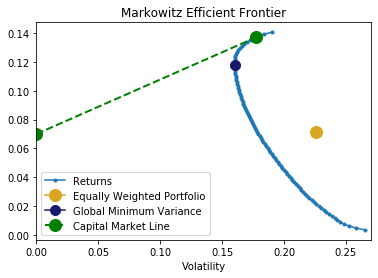

In [28]:
erk.plot_ef(100, er, cov, show_cml=True, riskfree_rate=0.07, show_ew=True, show_gmv=True)

In [14]:
w1 = erk.msr(0.07, er, cov)
w1

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.54299103e-02, 2.63263316e-15, 7.96836557e-01,
       0.00000000e+00, 1.27733533e-01, 0.00000000e+00, 3.00330094e-15,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [15]:
w2 = erk.gmv(cov)
w2

array([3.05383956e-16, 0.00000000e+00, 1.63819229e-15, 5.99979431e-16,
       4.58942356e-16, 0.00000000e+00, 0.00000000e+00, 4.14171340e-01,
       0.00000000e+00, 3.12300128e-01, 9.73278930e-16, 2.10714310e-01,
       1.24024399e-15, 1.36292338e-02, 0.00000000e+00, 2.11111733e-15,
       0.00000000e+00, 4.91849880e-02, 0.00000000e+00])

In [16]:
w11 = pd.Series(w1)
w22 = pd.Series(w2)

In [17]:
w11

0     0.000000e+00
1     0.000000e+00
2     0.000000e+00
3     0.000000e+00
4     0.000000e+00
5     7.542991e-02
6     2.632633e-15
7     7.968366e-01
8     0.000000e+00
9     1.277335e-01
10    0.000000e+00
11    3.003301e-15
12    0.000000e+00
13    0.000000e+00
14    0.000000e+00
15    0.000000e+00
16    0.000000e+00
17    0.000000e+00
18    0.000000e+00
dtype: float64

In [18]:
w22

0     3.053840e-16
1     0.000000e+00
2     1.638192e-15
3     5.999794e-16
4     4.589424e-16
5     0.000000e+00
6     0.000000e+00
7     4.141713e-01
8     0.000000e+00
9     3.123001e-01
10    9.732789e-16
11    2.107143e-01
12    1.240244e-15
13    1.362923e-02
14    0.000000e+00
15    2.111117e-15
16    0.000000e+00
17    4.918499e-02
18    0.000000e+00
dtype: float64

In [19]:
weights = pd.concat([w11, w22], axis=1)
weights

,0,1
0,0.000000e+00,3.053840e-16
1,0.000000e+00,0.000000e+00
2,0.000000e+00,1.638192e-15
3,0.000000e+00,5.999794e-16
4,0.000000e+00,4.589424e-16
5,7.542991e-02,0.000000e+00
6,2.632633e-15,0.000000e+00
7,7.968366e-01,4.141713e-01
8,0.000000e+00,0.000000e+00
9,1.277335e-01,3.123001e-01


In [20]:
weights = weights.T
weights.columns= [ticklist]
weights

,BSE AUTO,BSE BANKEX,BSE Basic Materials,BSE CAPITAL GOODS,BSE Consumer Discretionary Goods & Services,BSE CONSUMER DURABLES,BSE Energy,BSE Fast Moving Consumer Goods,BSE Finance,BSE Healthcare,BSE Industrials,BSE Information Technology,BSE METAL,BSE OIL & GAS,BSE POWER,BSE REALTY,BSE TECK,BSE Telecom,BSE Utilities
0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.07543,2.632633e-15,0.796837,0.0,0.127734,0.000000e+00,3.003301e-15,0.000000e+00,0.000000,0.0,0.000000e+00,0.0,0.000000,0.0
1,3.053840e-16,0.0,1.638192e-15,5.999794e-16,4.589424e-16,0.00000,0.000000e+00,0.414171,0.0,0.312300,9.732789e-16,2.107143e-01,1.240244e-15,0.013629,0.0,2.111117e-15,0.0,0.049185,0.0


In [21]:
weights = weights.T

In [23]:
returns_list = er.to_list()

In [24]:
weights['Annualized Returns'] = returns_list

In [25]:
weights

,0,1,Annualized Returns
BSE AUTO,0.000000e+00,3.053840e-16,0.090397
BSE BANKEX,0.000000e+00,0.000000e+00,0.109953
BSE Basic Materials,0.000000e+00,1.638192e-15,0.060641
BSE CAPITAL GOODS,0.000000e+00,5.999794e-16,0.054088
BSE Consumer Discretionary Goods & Services,0.000000e+00,4.589424e-16,0.075119
BSE CONSUMER DURABLES,7.542991e-02,0.000000e+00,0.133129
BSE Energy,2.632633e-15,0.000000e+00,0.108477
BSE Fast Moving Consumer Goods,7.968366e-01,4.141713e-01,0.140551
BSE Finance,0.000000e+00,0.000000e+00,0.109558
BSE Healthcare,1.277335e-01,3.123001e-01,0.117839


In [26]:
weights.columns = ['Weight in Maximum Sharpe Portfolio', 'Weight in Global Minimum Variance Portfolio', 'Annualized Returns']
weights.index.rename('Sectoral index', inplace=True)
round(weights, 4)

,Weight in Maximum Sharpe Portfolio,Weight in Global Minimum Variance Portfolio,Annualized Returns
Sectoral index,,,
BSE AUTO,0.0000,0.0000,0.0904
BSE BANKEX,0.0000,0.0000,0.1100
BSE Basic Materials,0.0000,0.0000,0.0606
BSE CAPITAL GOODS,0.0000,0.0000,0.0541
BSE Consumer Discretionary Goods & Services,0.0000,0.0000,0.0751
BSE CONSUMER DURABLES,0.0754,0.0000,0.1331
BSE Energy,0.0000,0.0000,0.1085
BSE Fast Moving Consumer Goods,0.7968,0.4142,0.1406
BSE Finance,0.0000,0.0000,0.1096
